In [1]:
import cv2
import numpy as np

In [2]:
img = cv2.imread('images/sachin.jpg')

In [3]:
img_new = cv2.resize(img, None, fx=0.5, fy=0.5)
cv2.imwrite('images/sachin_new.jpg', img_new)

True

##### Averaging Kernel

In [5]:
kernel = np.ones([3,3], dtype=np.float32)

In [6]:
kernel

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [7]:
kernel = kernel / 9

In [8]:
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]], dtype=float32)

In [9]:
x = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [10]:
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [12]:
np.sum(x * kernel)

5.000000037252903

In [13]:
help(cv2.filter2D)

Help on built-in function filter2D:

filter2D(...)
    filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) -> dst
    .   @brief Convolves an image with the kernel.
    .   
    .   The function applies an arbitrary linear filter to an image. In-place operation is supported. When
    .   the aperture is partially outside the image, the function interpolates outlier pixel values
    .   according to the specified border mode.
    .   
    .   The function does actually compute correlation, not the convolution:
    .   
    .   \f[\texttt{dst} (x,y) =  \sum _{ \substack{0\leq x' < \texttt{kernel.cols}\\{0\leq y' < \texttt{kernel.rows}}}}  \texttt{kernel} (x',y')* \texttt{src} (x+x'- \texttt{anchor.x} ,y+y'- \texttt{anchor.y} )\f]
    .   
    .   That is, the kernel is not mirrored around the anchor point. If you need a real convolution, flip
    .   the kernel using #flip and set the new anchor to `(kernel.cols - anchor.x - 1, kernel.rows -
    .   anchor.y - 1)`.
    

In [14]:
img_gray = cv2.cvtColor(img_new, cv2.COLOR_BGR2GRAY)

In [15]:
final_img = cv2.filter2D(img_gray, -1, kernel)

In [16]:
import matplotlib.pyplot as plt

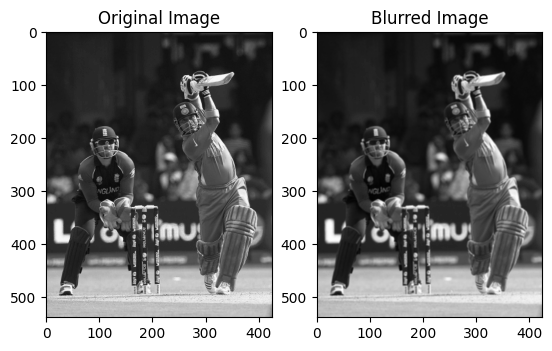

In [18]:
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img_gray, cmap = 'gray')
plt.subplot(1,2,2)
plt.title('Blurred Image')
plt.imshow(final_img, cmap = 'gray')

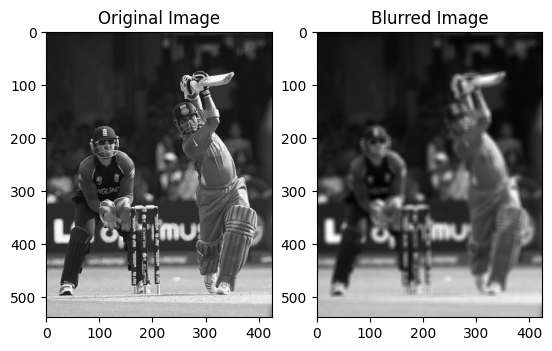

In [19]:
kernel = np.ones([9,9], dtype=np.float32) / 81
final_img = cv2.filter2D(img_gray, -1, kernel)

plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img_gray, cmap = 'gray')
plt.subplot(1,2,2)
plt.title('Blurred Image')
plt.imshow(final_img, cmap = 'gray')

##### Gaussian Kernel

In [23]:
gaussian_kernel = cv2.getGaussianKernel(7, 1.34)

In [24]:
gaussian_kernel

array([[0.02447269],
       [0.09847965],
       [0.22706248],
       [0.29997037],
       [0.22706248],
       [0.09847965],
       [0.02447269]])

In [25]:
gaussian_kernel.shape

(7, 1)

In [26]:
img_gauss = cv2.filter2D(img_gray, -1, gaussian_kernel)

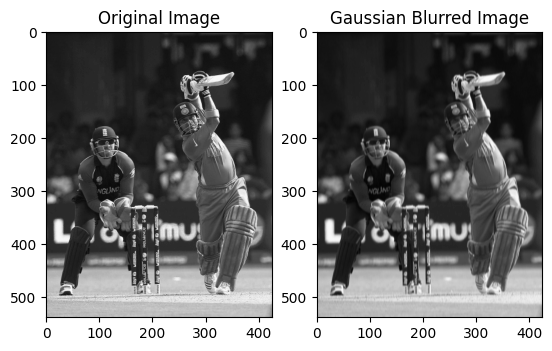

In [27]:
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img_gray, cmap = 'gray')
plt.subplot(1,2,2)
plt.title('Gaussian Blurred Image')
plt.imshow(img_gauss, cmap = 'gray')

##### Median Blur

In [29]:
help(cv2.medianBlur)

Help on built-in function medianBlur:

medianBlur(...)
    medianBlur(src, ksize[, dst]) -> dst
    .   @brief Blurs an image using the median filter.
    .   
    .   The function smoothes an image using the median filter with the \f$\texttt{ksize} \times
    .   \texttt{ksize}\f$ aperture. Each channel of a multi-channel image is processed independently.
    .   In-place operation is supported.
    .   
    .   @note The median filter uses #BORDER_REPLICATE internally to cope with border pixels, see #BorderTypes
    .   
    .   @param src input 1-, 3-, or 4-channel image; when ksize is 3 or 5, the image depth should be
    .   CV_8U, CV_16U, or CV_32F, for larger aperture sizes, it can only be CV_8U.
    .   @param dst destination array of the same size and type as src.
    .   @param ksize aperture linear size; it must be odd and greater than 1, for example: 3, 5, 7 ...
    .   @sa  bilateralFilter, blur, boxFilter, GaussianBlur



In [30]:
img_med = cv2.medianBlur(img_gray, 5)

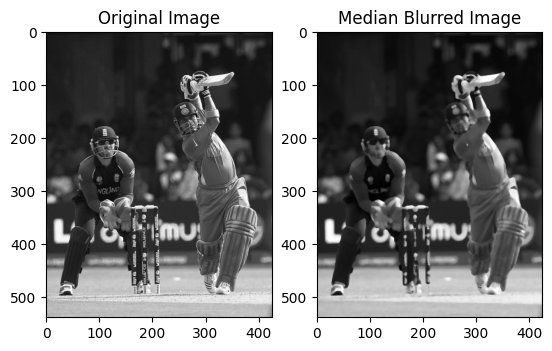

In [31]:
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img_gray, cmap = 'gray')
plt.subplot(1,2,2)
plt.title('Median Blurred Image')
plt.imshow(img_med, cmap = 'gray')